### **A autocorrelação é a correlação cruzada de um sinal com o ele próprio. É uma ferramenta matemática para encontrar padrões de repetição, tal como a presença de um sinal periódico obscurecidos pelo ruído, ou para identificar a frequência fundamental em falta num sinal implícita pelas suas frequências harmónicas.**

In [40]:
#instalando biblioteca

In [41]:
!pip install yfinance
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from scipy.stats.distributions import gompertz
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
import plotly.graph_objects as go 
import plotly.express as px
import matplotlib.pyplot as plt
import yfinance as yf


In [43]:
vale3 = yf.download('VALE3.SA',start='2021-01-01', end='2021-12-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [44]:
px.line(x=vale3.index, y=vale3, template ='simple_white', width=600, height=400).\
update_layout(paper_bgcolor='#f7f8fa', margin=dict(l=20,r=20,t=50,b=20),
             title='<b>VALE3 em 2021', xaxis_title='<b>DATA', yaxis_title='<b>Fechamento Ajustado (R$)')

In [45]:
#correlação de Pearson

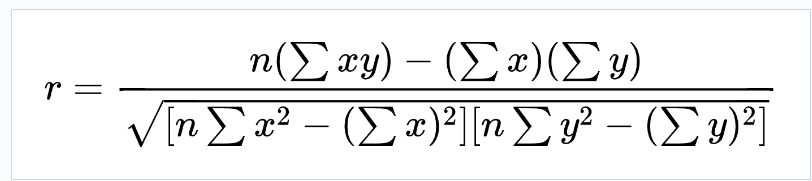

In [46]:
px.scatter(x=vale3.index, y=vale3, template ='simple_white', width=600, height=400).\
update_layout(paper_bgcolor='#f7f8fa', margin=dict(l=20,r=20,t=50,b=20))

In [47]:
corr, p  = stats.pearsonr(vale3, vale3)
print("corrleação de Pearson, r=%.3f" %corr, 'p=%.3f' %p)

corrleação de Pearson, r=1.000 p=0.000


In [48]:
#lag de 1 periodo

In [49]:
vale3_df = pd.concat([vale3,vale3.shift(1)],axis=1)
vale3_df.columns=['Original', 'Antecessor']
vale3_df

,Original,Antecessor
Date,,
2021-01-04,71.178856,NaN
2021-01-05,72.377365,71.178856
2021-01-06,74.751038,72.377365
2021-01-07,79.630661,74.751038
2021-01-08,79.381622,79.630661
...,...,...
2021-12-23,72.463852,73.168800
2021-12-27,72.280739,72.463852
2021-12-28,70.541245,72.280739


In [50]:
#Remover Nan

In [51]:
vale3_df.dropna(inplace=True)

In [52]:
px.scatter(x=vale3_df['Original'], y=vale3_df['Antecessor'], template= 'simple_white', width=600,height=400).\
update_layout(paper_bgcolor='#f7f8fa', margin=dict(l=20,r=20,t=50,b=20))


In [53]:
corr, p = stats.pearsonr(vale3_df['Original'],vale3_df['Antecessor'])
print("corrleação de Pearson, r=%.3f" %corr, 'p=%.3f' %p)

corrleação de Pearson, r=0.986 p=0.000


In [54]:
#Autocorrelação
vale3_df['Original'].autocorr(lag=1)

0.9863271727269544

In [59]:
vale3_df['lag10'] = vale3_df["Original"].shift(10)
vale3_df.dropna(inplace=True)

In [63]:
corr, p = stats.pearsonr(vale3_df['Original'],vale3_df['lag10'])
print("corrleação de Pearson, r=%.3f" %corr, 'p=%.3f' %p)

corrleação de Pearson, r=0.885 p=0.000


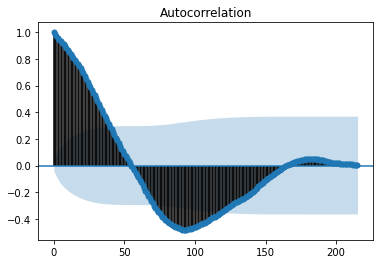

In [64]:
plot_acf(vale3_df['Original'], lags=range(0, len(vale3_df['Original']),1), alpha=0.5).show()

In [65]:
vale3_df['retornos']= vale3_df['Original'].pct_change()

In [66]:
vale3_df.dropna(inplace=True)

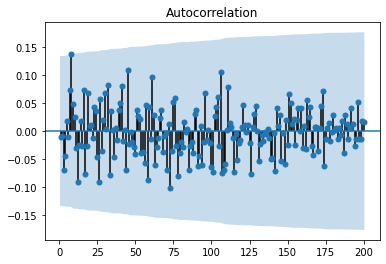

In [69]:
plot_acf(vale3_df['retornos'],lags=200, alpha=0.05, zero=False).show()

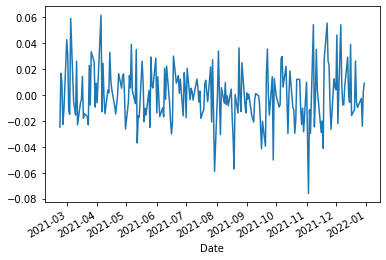

In [70]:
vale3_df['retornos'].plot()